In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import matplotlib.cm as cm
import glob

from astropy.table import Table, vstack

In [2]:
def convert_category(string):
    if "Junior" in string:
        return 1
    elif "Assistant" in string:
        return 2
    elif "Principal" in string:
        return 3
    elif "Coordinating" in string:
        return 4
    else:
        raise ValueError(f"Invalid string: {string}")
    
def convert_acceptance(string):
    if "Yes" in string:
        return 1
    elif "No" in string:
        return 0
    else:
        print(f"Invalid string: {string}")
        return -1 
    
def convert_score(string):
    numbers = string.split(",")
    if len(numbers)==2:
        return float(numbers[0]) + float(numbers[1])/10
    else:
        if len(numbers[0])>0:
            return float(numbers[0])
        else:
            return -9
    
def read_ceec(fname):
    f = open(fname,"r")
    txt = f.readlines()
    f.close()
    
    CEEC_TABLE = Table(names=('Ref.','Name','Position', 'Area', 'Institute', 'Score', 'FinalScore','Accepted'),\
                       dtype=('S25', 'S100', 'i8', 'S150', 'S150','f4','f4', 'i8'))
    hdr = txt[3].split(";")
    for line in txt[4:]:
        data = line.split(";")
        
        if len(data[0]) == 0 or len(data[0])>20:
            continue
            
        ref = data[0]
        name = data[1].encode('utf-8')
        pos = convert_category(data[2])
        area = data[3]
        inst = data[4].encode('utf-8')
        score = convert_score(data[5])
        final_score = convert_score(data[6])
        accepted = convert_acceptance(data[7])
        CEEC_TABLE.add_row([ref,name,pos,area,inst,score,final_score,accepted])
#         break
        
    return CEEC_TABLE

def success_per_level(added_selection = None):
    Levels = ["Junior", "Assistant", "Principal", "Coordinating"]
    
    Selections = [sel_junior,sel_assistant,sel_principal,sel_coord]
    if added_selection is None:
        pass
    else:
        Selections = [added_selection & sel for sel in Selections]
        
    for category,selection in zip(Levels,Selections):

        print("\n" + "="*10 + f" {category} " + "="*10 + "\n")
        N_applications = len(TableMaster[selection])
        sel_merit = (TableMaster["FinalScore"] >= 8) & selection
        sel_accepted = (TableMaster["Accepted"] == 1 ) & selection
        N_merit = len(TableMaster[sel_merit])
        N_accepted = len(TableMaster[sel_accepted])

        print(f"Total applications: {N_applications} applications")

        print(f"Note 8 or higher: {N_merit} applications - {N_merit/N_applications*100:.1f}%")

        print(f"Accepted: {N_accepted} applications")
        print(f"Accepted: {N_accepted/N_applications*100:.1f}% total applications")
        print(f"Accepted: {N_accepted/N_merit*100:.1f}% merit applications")
        
    return None

# Read Tables 

In [3]:
data_CEEC2018 = "./CEECIND_2018_Resultados_apos_Avaliacao_RAA/"
files_CEEC2018 = np.sort(glob.glob(f"{data_CEEC2018}/*.csv"))
print(files_CEEC2018)

data_CEEC2017 = "./CEECIND2017_Resultados_apos_AP/"
files_CEEC2017 = np.sort(glob.glob(f"{data_CEEC2017}/*.csv"))
print(files_CEEC2017)

all_tables = []
for table_name in files_CEEC2018:
    all_tables.append(read_ceec(f"{table_name}"))
TableMasterCEEC2018 = vstack(all_tables)


all_tables = []
for table_name in files_CEEC2017:
    all_tables.append(read_ceec(f"{table_name}"))
TableMasterCEEC2017 = vstack(all_tables)

['./CEECIND_2018_Resultados_apos_Avaliacao_RAA/Assistant-Table.csv'
 './CEECIND_2018_Resultados_apos_Avaliacao_RAA/Coordinating-Table.csv'
 './CEECIND_2018_Resultados_apos_Avaliacao_RAA/Junior-Table.csv'
 './CEECIND_2018_Resultados_apos_Avaliacao_RAA/Principal-Table.csv']
['./CEECIND2017_Resultados_apos_AP/Assistant-Table.csv'
 './CEECIND2017_Resultados_apos_AP/Coordinator-Table.csv'
 './CEECIND2017_Resultados_apos_AP/Junior-Table.csv'
 './CEECIND2017_Resultados_apos_AP/Principal-Table.csv']
Invalid string: 
Invalid string: 
Invalid string: 
Invalid string: 
Invalid string: 
Invalid string: 
Invalid string: 
Invalid string: 


# Create selection based on contract level

In [4]:

TableMaster = TableMasterCEEC2018
sel_junior = (TableMaster["Position"]==1)
sel_assistant = (TableMaster["Position"]==2)
sel_principal = (TableMaster["Position"]==3)
sel_coord = (TableMaster["Position"]==4)



# Global Statistics

In [5]:
N_applications = len(TableMaster)

sel_merit = (TableMaster["FinalScore"] >= 8)
sel_accepted = (TableMaster["Accepted"] == 1 )
N_merit = len(TableMaster[sel_merit])
N_accepted = len(TableMaster[sel_accepted])

print(f"Total applications: {N_applications} applications")

print(f"Note 8 or higher: {N_merit} applications - {N_merit/N_applications*100:.1f}%")

print(f"Accepted: {N_accepted} applications")
print(f"Accepted: {N_accepted/N_applications*100:.1f}% total applications")
print(f"Accepted: {N_accepted/N_merit*100:.1f}% merit applications")



Total applications: 3631 applications
Note 8 or higher: 1673 applications - 46.1%
Accepted: 300 applications
Accepted: 8.3% total applications
Accepted: 17.9% merit applications


## Statistics per level

In [6]:
success_per_level()


========== Junior ==========

Total applications: 2175 applications
Note 8 or higher: 944 applications - 43.4%
Accepted: 158 applications
Accepted: 7.3% total applications
Accepted: 16.7% merit applications

========== Assistant ==========

Total applications: 1098 applications
Note 8 or higher: 564 applications - 51.4%
Accepted: 104 applications
Accepted: 9.5% total applications
Accepted: 18.4% merit applications

========== Principal ==========

Total applications: 348 applications
Note 8 or higher: 157 applications - 45.1%
Accepted: 37 applications
Accepted: 10.6% total applications
Accepted: 23.6% merit applications

========== Coordinating ==========

Total applications: 10 applications
Note 8 or higher: 8 applications - 80.0%
Accepted: 1 applications
Accepted: 10.0% total applications
Accepted: 12.5% merit applications


## Statistics per area

In [7]:
sel_physics = (TableMaster["Area"] == b"Physical Sciences")
N_physics = len(TableMaster[sel_physics])
print(f"Total applications in Physical Sciences: {N_physics} applications")
success_per_level(sel_physics)

Total applications in Physical Sciences: 179 applications

========== Junior ==========

Total applications: 81 applications
Note 8 or higher: 33 applications - 40.7%
Accepted: 6 applications
Accepted: 7.4% total applications
Accepted: 18.2% merit applications

========== Assistant ==========

Total applications: 63 applications
Note 8 or higher: 30 applications - 47.6%
Accepted: 6 applications
Accepted: 9.5% total applications
Accepted: 20.0% merit applications

========== Principal ==========

Total applications: 34 applications
Note 8 or higher: 17 applications - 50.0%
Accepted: 3 applications
Accepted: 8.8% total applications
Accepted: 17.6% merit applications

========== Coordinating ==========

Total applications: 1 applications
Note 8 or higher: 1 applications - 100.0%
Accepted: 0 applications
Accepted: 0.0% total applications
Accepted: 0.0% merit applications


# Scores per Area

(-1, 1)

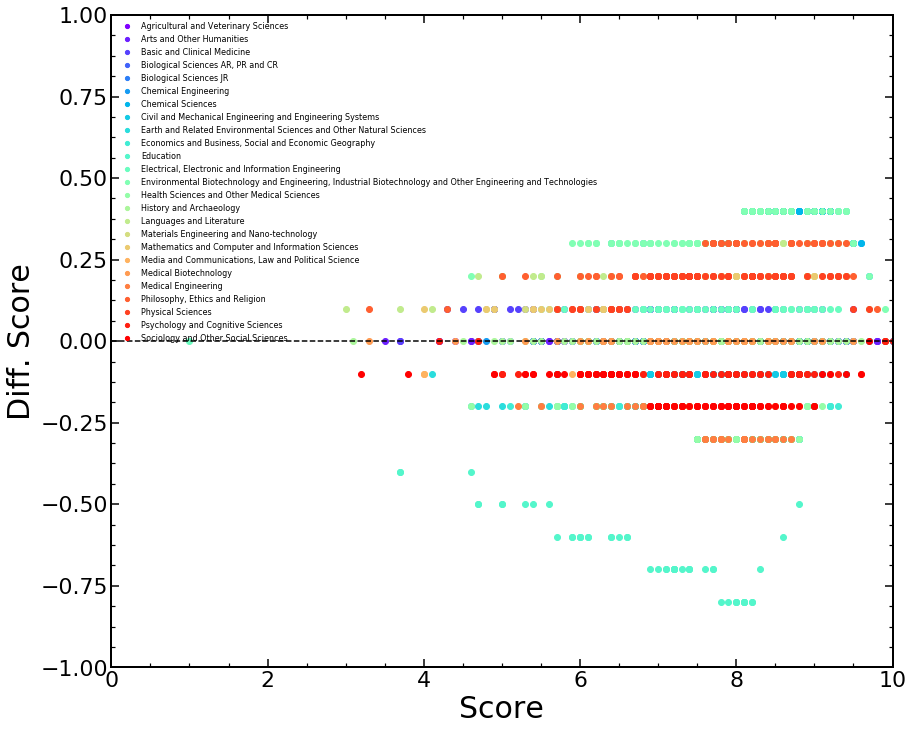

In [8]:
pre_sel = sel_junior
areas = np.unique(TableMaster["Area"])

colors = np.linspace(0,1,len(areas))
cmap = cm.rainbow

fig,ax = mpl.subplots(figsize=(14,12))


for i,area in enumerate(areas):
    sel_area = (TableMaster["Area"]==area) & pre_sel

    x = TableMaster["Score"][sel_area]
    y = TableMaster["FinalScore"][sel_area]
    ax.plot(x,x-y,"o",color=cmap(colors[i]),label=area)
    
ax.set_xlabel("Score")
ax.set_ylabel("Diff. Score")
ax.legend(fontsize=8,loc="upper left",ncol=1)

ax.plot([0,10],[0,0],"k--")
ax.set_xlim(0,10)
ax.set_ylim(-1,1)


##  Mean score difference

Agricultural and Veterinary Sciences 8.021053 7.9236846
Arts and Other Humanities 7.5980096 7.5069647
Basic and Clinical Medicine 7.2847223 7.1715274
Biological Sciences AR, PR and CR 7.866512 7.8251157
Biological Sciences JR 7.820417 7.820417
Chemical Engineering 7.8576474 7.9282355
Chemical Sciences 8.487 8.0975
Civil and Mechanical Engineering and Engineering Systems 7.764754 7.7532787
Earth and Related Environmental Sciences and Other Natural Sciences 7.6860986 7.788789
Economics and Business, Social and Economic Geography 7.644445 7.8454547
Education 6.8389606 7.354545
Electrical, Electronic and Information Engineering 7.787778 7.6488886
Environmental Biotechnology and Engineering, Industrial Biotechnology and Other Engineering and Technologies 7.986813 7.669231
Health Sciences and Other Medical Sciences 7.6262865 7.771428
History and Archaeology 7.6140103 7.5917873
Languages and Literature 7.5839505 7.2395062
Materials Engineering and Nano-technology 7.8065352 7.7169933
Mathemati

(6.9, 8.4)

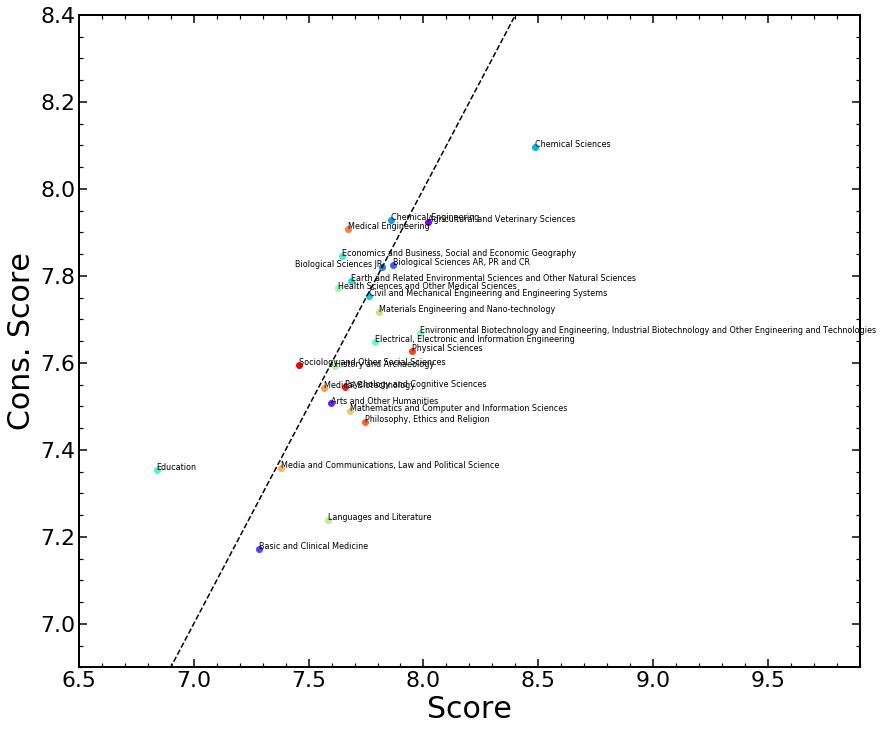

In [21]:
pre_sel = True#sel_junior  ## select all levels
areas = np.unique(TableMaster["Area"])

colors = np.linspace(0,1,len(areas))
cmap = cm.rainbow

fig,ax = mpl.subplots(figsize=(14,12))


for i,area in enumerate(areas):
    sel_area = (TableMaster["Area"]==area) & pre_sel

    x = TableMaster["Score"][sel_area]
    y = TableMaster["FinalScore"][sel_area]
    ax.plot(np.mean(x),np.mean(y),"o",color=cmap(colors[i]))
    print(area,np.mean(x),np.mean(y))
    
    if np.isfinite(np.mean(x)):
        if np.mean(x)-np.mean(y):
            ha="left"
        else:
            ha="right"
        ax.text(np.mean(x),np.mean(y),area,fontsize=8,ha=ha)
    
ax.set_xlabel("Score")
ax.set_ylabel("Cons. Score")

ax.plot([0,10],[0,10],"k--")
ax.set_xlim(6.5,9.9)
ax.set_ylim(6.9,8.4)


## Scores per area: distributions

/Users/bribeiro/miniconda3/envs/astro/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3254: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/bribeiro/miniconda3/envs/astro/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


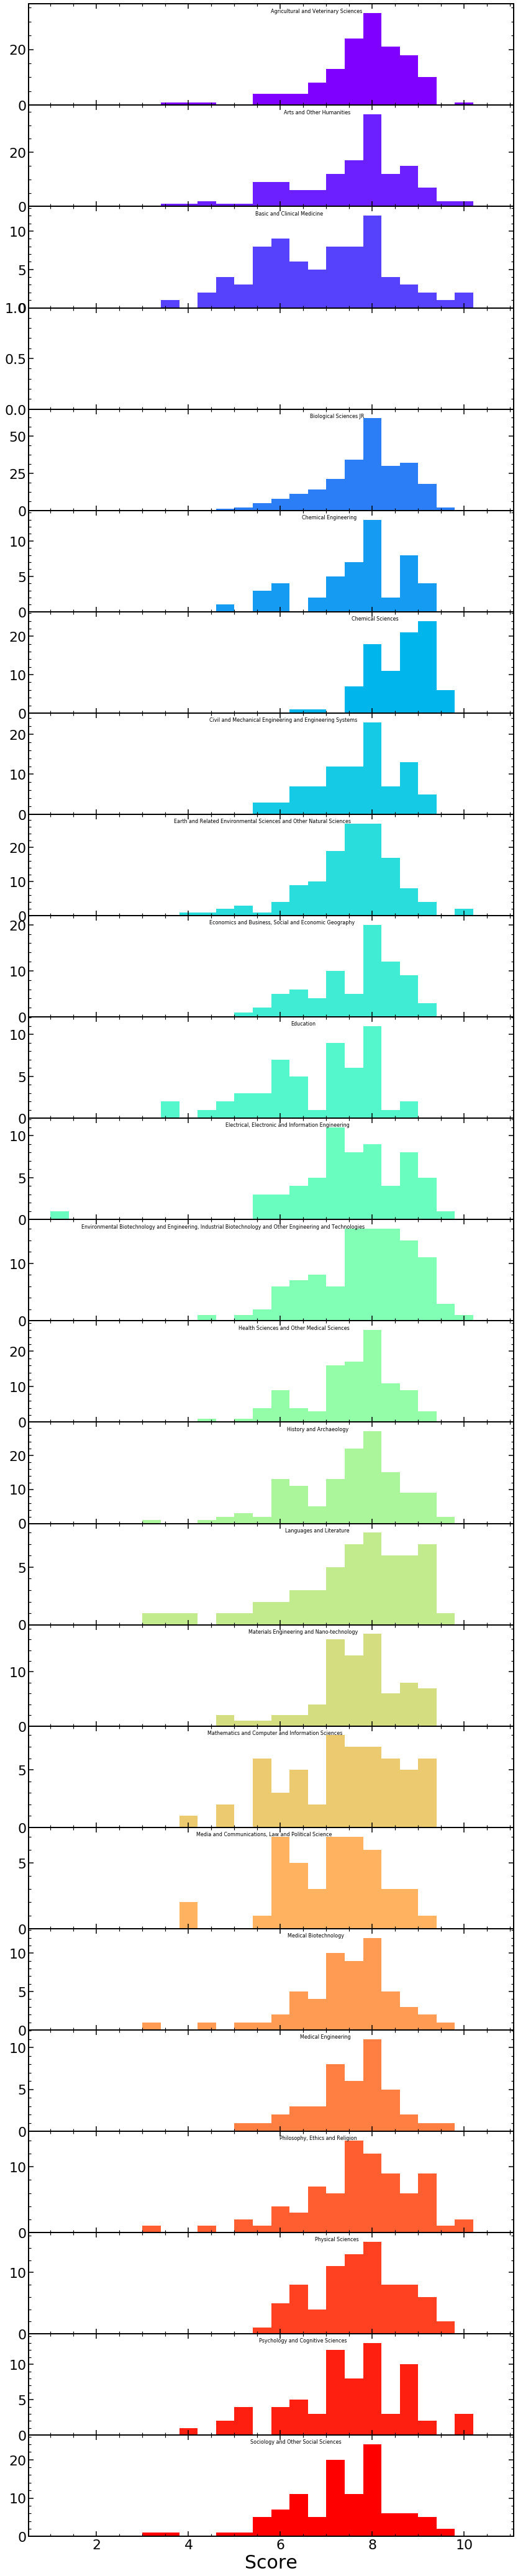

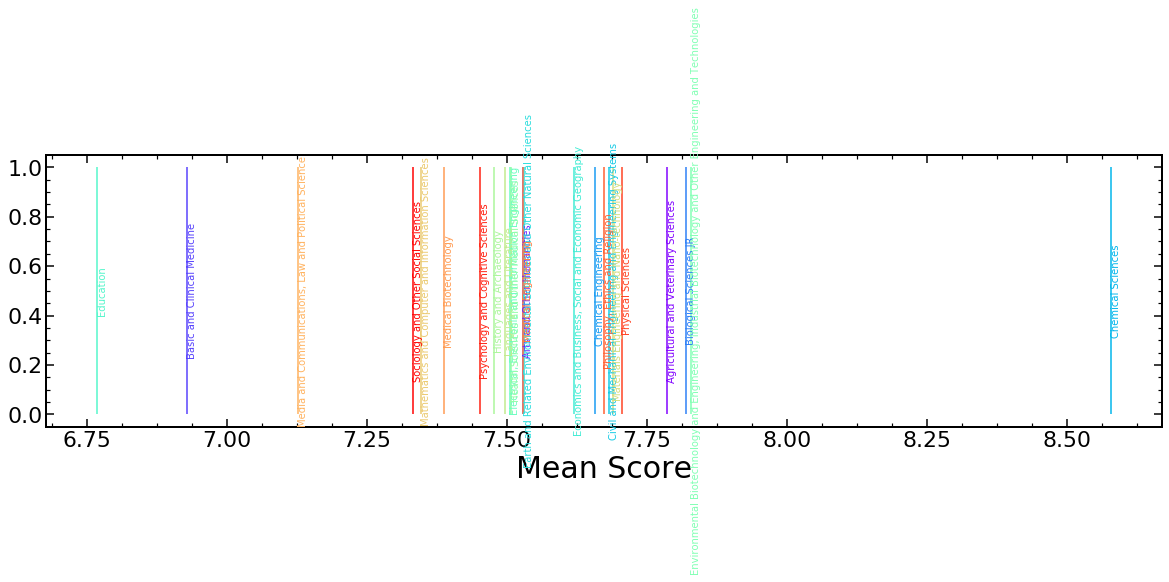

In [10]:
pre_sel = sel_junior ## select junior level
areas = np.unique(TableMaster["Area"])

colors = np.linspace(0,1,len(areas))
cmap = cm.rainbow

score_bins = np.arange(1,11,0.4)

fig,ax = mpl.subplots(len(areas),1,figsize=(14,3*len(areas)),sharex=True)
fig.subplots_adjust(hspace=0)

figA,axA = mpl.subplots(1,1,figsize=(20,5))

for i,area in enumerate(areas):
    sel_area = (TableMaster["Area"]==area) & pre_sel

    x = TableMaster["Score"][sel_area]
    
    if not np.isfinite(np.mean(x)):
        continue
        
    H,_,_ = ax[i].hist(x,bins=score_bins,color=cmap(colors[i]))
    ax[i].text(np.mean(x),1.01*np.amax(H),area,fontsize=8,ha="right")
    ax[i].set_ylim(0,1.1*np.amax(H))
    axA.vlines(np.mean(x),0,1,color=cmap(colors[i]))
    axA.text(np.mean(x),0.5,area,rotation=90,color=cmap(colors[i]),va="center")

ax[-1].set_xlabel("Score")
axA.set_xlabel("Mean Score")
figA.savefig("mean_score_junior.png")
fig.savefig("score_distributions.png")
# ax.set_ylabel("Cons. Score")

# ax.plot([0,10],[0,10],"k--")
# ax.set_xlim(6.5,9.9)
# ax.set_ylim(6.9,8.4)


# Cross reference 2017 - 2018 results

In [42]:
def find_matches(table1,table2,samelevel=False):
    
    scorediff = []
    scores = []
    names = []
    
    N_degraded = 0
    N_upgraded = 0
    for i in range(len(table1)):
        name2search = table1["Name"][i]
        match = (table2["Name"]==name2search)
        if True in match:
            score1 = table1["Score"][i]
            score2 = table2["Score"][match][0]
            if samelevel is False:
                scorediff.append(score2-score1)
                scores.append([score1,score2])
                names.append(name2search)

            else:
                if table1["Position"][i] == table2["Position"][match][0]:
                    scorediff.append(score2-score1)
                    scores.append([score1,score2])
                    names.append(name2search)
            if table1["Position"][i] > table2["Position"][match][0]:
                N_degraded +=1
            elif table1["Position"][i] < table2["Position"][match][0]:
                N_upgraded += 1 
        else:
            continue
#             print("No match")
#         break
    print(f"Lowered position: {N_degraded}")
    print(f"Upgraded position: {N_upgraded}")
    return np.asarray(names), np.asarray(scorediff), np.asarray(scores)

def find_double_acceptance(table1,table2):
    diff = []
    names = []
    for i in range(len(table1)):
        name2search = table1["Name"][i]
        match = (table2["Name"]==name2search)
        if True in match:
            names.append(name2search)
            accetpted1 = table1["Accepted"][i]
            accetpted2 = table2["Accepted"][match][0]
            if accetpted1 == 0 and  accetpted2 == 0:
                diff.append(0)
            elif accetpted1 == 1 and accetpted2 == 0:
                diff.append(1)
            elif accetpted1 == 0 and accetpted2 == 1:
                diff.append(2)
            elif accetpted1 == 1 and accetpted2 == 1:
                diff.append(3)
        else:
            continue
    return np.asarray(names),np.asarray(diff)

def find_entry(name,table1,table2):
    match1 = (table1["Name"] == name)
    match2 = (table2["Name"] == name)
    print("\n")
    print(name)
    print("Scores:   2017 - ",table1["Score"][match1][0],"2018 - ",table2["Score"][match2][0])
    print("Position: 2017 - ",table1["Position"][match1][0],"2018 - ",table2["Position"][match2][0])
    print("Area: 2017 - ",table1["Area"][match1][0],"2018 - ",table2["Area"][match2][0])
    print("Institute: 2017 - ",table1["Institute"][match1][0],"2018 - ",table2["Institute"][match2][0])
    print("\n")
    return


## Score differences (scatter)

Lowered position: 112
Upgraded position: 125


No handles with labels found to put in legend.


Lowered position: 112
Upgraded position: 125


Text(0.5, 1.0, 'Same level = 1646')

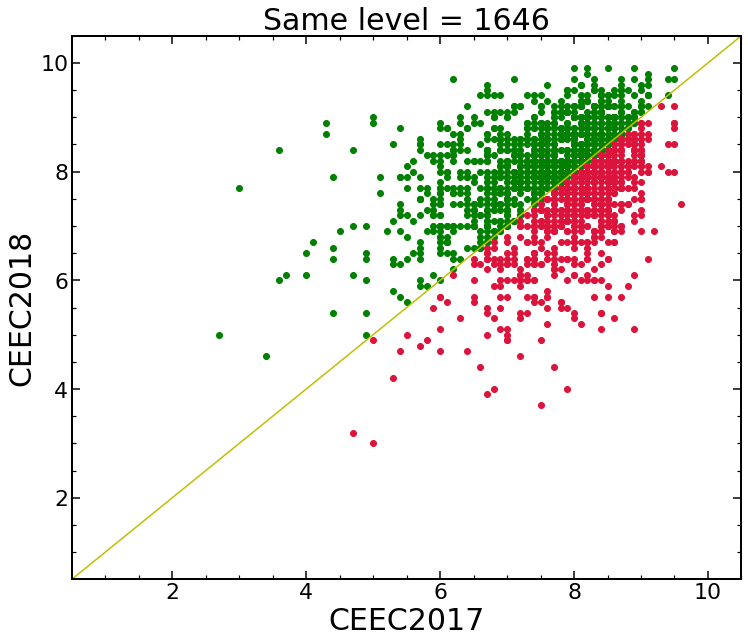

In [43]:

_,score_difference_full,_ = find_matches(TableMasterCEEC2017,TableMasterCEEC2018)
names_diff, score_difference_slevel,scores = find_matches(TableMasterCEEC2017,TableMasterCEEC2018,samelevel=True)


fig,ax = mpl.subplots(figsize=(12,10))

sel_pos = scores[:,0]<=scores[:,1]
sel_neg = scores[:,0]>scores[:,1]
ax.plot(scores[sel_pos,0],scores[sel_pos,1],"o",color="green")
ax.plot(scores[sel_neg,0],scores[sel_neg,1],"o",color="crimson")

ax.plot([-1,11],[-1,11],"y-")
ax.set_xlabel(r"CEEC2017")
ax.set_ylabel(r"CEEC2018")

# xpos = 2.5
# ypos = 250
# ax.text(-xpos,ypos,"Worse score",color="red",fontsize=25,ha="center")
# ax.text(+xpos,ypos,"Better score",color="green",fontsize=25,ha="center")

ax.legend()
ax.set_xlim(0.5,10.5)
ax.set_ylim(0.5,10.5)
ax.set_title(f"Same level = {len(score_difference_slevel)}")



# Score differences (histogram)

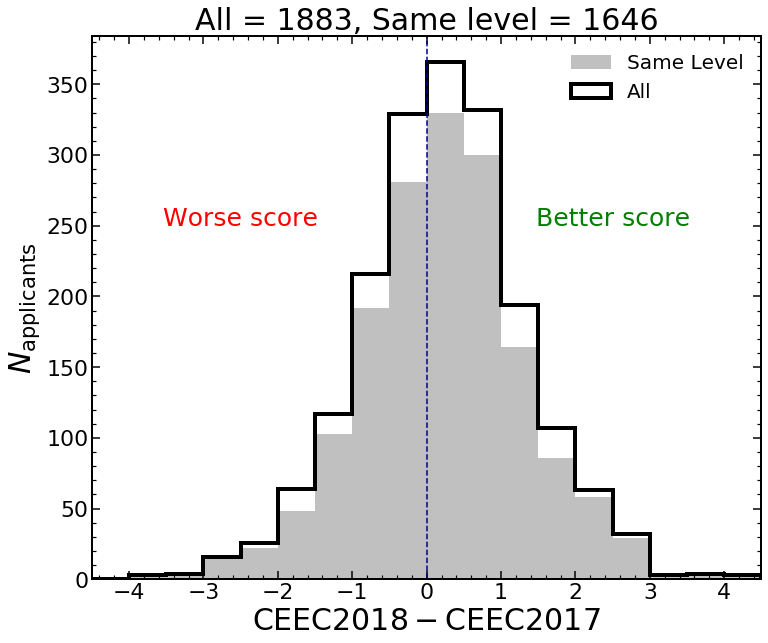

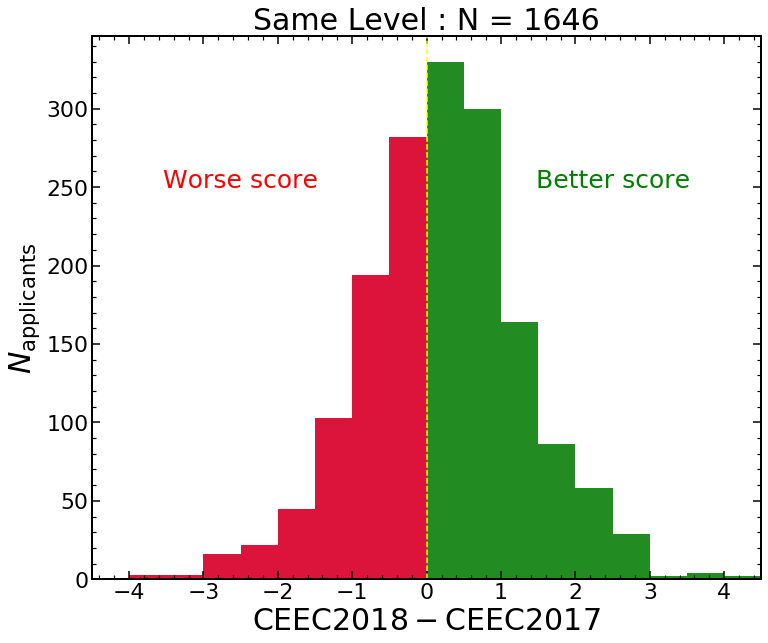

In [14]:
bins = np.arange(-5.5,5,0.5)
bins

fig,ax = mpl.subplots(figsize=(12,10))
ax.hist(score_difference_slevel,bins=bins,label = "Same Level",color="Silver",histtype="stepfilled",linewidth=0.1)
H,_,_ = ax.hist(score_difference_full,bins=bins, label = "All",color="k",histtype="step",linewidth=4)
ax.set_xlabel(r"$\mathrm{CEEC2018 - CEEC2017}$")
ax.set_ylabel(r"$N_\mathrm{applicants}$")
ax.vlines(0,0,1.1*np.amax(H),color="Navy",linestyle="dashed")
ax.set_ylim(0,1.05*np.amax(H))

xpos = 2.5
ypos = 250
ax.text(-xpos,ypos,"Worse score",color="red",fontsize=25,ha="center")
ax.text(+xpos,ypos,"Better score",color="green",fontsize=25,ha="center")

ax.legend()
ax.set_xlim(-4.5,4.5)
ax.set_title(f"All = {len(score_difference_full)}, Same level = {len(score_difference_slevel)}")



fig,ax = mpl.subplots(figsize=(12,10))
ax.hist(score_difference_slevel,bins=bins[bins<=0]-1e-4,color="Crimson",histtype="stepfilled",linewidth=0.1)
H,_,_  = ax.hist(score_difference_slevel,bins=bins[bins>=0],color="ForestGreen",histtype="stepfilled",linewidth=0.1)

ax.set_xlabel(r"$\mathrm{CEEC2018 - CEEC2017}$")
ax.set_ylabel(r"$N_\mathrm{applicants}$")
ax.vlines(0,0,1.1*np.amax(H),color="yellow",linestyle="dashed")
ax.set_ylim(0,1.05*np.amax(H))

ax.text(-xpos,ypos,"Worse score",color="red",fontsize=25,ha="center")
ax.text(+xpos,ypos,"Better score",color="green",fontsize=25,ha="center")
ax.set_xlim(-4.5,4.5)
ax.set_title(f"Same Level : N = {len(score_difference_slevel)}")
fig.savefig("score_change.png")


## Repeated Applications

In [16]:
names, final = find_double_acceptance(TableMasterCEEC2017,TableMasterCEEC2018)

N_rejected = len(final[final==0])
N_accepted_2017 = len(final[final==1])
N_accepted_2018 = len(final[final==2])
N_accepted_both = len(final[final==3])

print(f"N rejected both years: {N_rejected}")
print(f"N accepted 2017, rejected 2018: {N_accepted_2017}")
print(f"N rejected 2017, accepted 2018: {N_accepted_2018}")
print(f"N accepted 2017, accepted 2018: {N_accepted_both}")



N rejected both years: 1719
N accepted 2017, rejected 2018: 21
N rejected 2017, accepted 2018: 137
N accepted 2017, accepted 2018: 6


In [24]:
## Accepted both years list

for name in names[final==3]:
    find_entry(name,TableMasterCEEC2017,TableMasterCEEC2018)



Tiago Correia de Oliveira Rodrigues
Scores:   2017 -  9.5 2018 -  9.9
Position: 2017 -  2 2018 -  2
Area: 2017 -  Chemical Sciences 2018 -  Chemical Sciences
Institute: 2017 -  Instituto de Medicina Molecular João lobo Antunes (IMM/FM/ULisboa) 2018 -  Instituto de Investigação do Medicamento (iMed/FF/ULisboa)




Cristina Amorim Cunha
Scores:   2017 -  9.7 2018 -  9.2
Position: 2017 -  1 2018 -  2
Area: 2017 -  Health Sciences and Other Medical Sciences 2018 -  Health Sciences and Other Medical Sciences
Institute: 2017 -  ICVS/3B`s - Laboratório Associado (ICVS/3B`s) 2018 -  ICVS/3B`s - Laboratório Associado (ICVS/3B`s)




Guillermin Aguero Chapin
Scores:   2017 -  9.0 2018 -  9.1
Position: 2017 -  1 2018 -  2
Area: 2017 -  Biological Sciences JR 2018 -  Biological Sciences AR, PR and CR
Institute: 2017 -  Centro Interdisciplinar de Investigação Marinha e Ambiental (CIIMAR/CIMAR) 2018 -  Centro Interdisciplinar de Investigação Marinha e Ambiental (CIIMAR/CIMAR)




Pedro Miguel Soar

In [25]:
## Accepted 2017, rejected 2018 list

for name in names[final==1]:
    find_entry(name,TableMasterCEEC2017,TableMasterCEEC2018)



Joana Rodrigues Arantes da Silva
Scores:   2017 -  9.7 2018 -  8.0
Position: 2017 -  2 2018 -  3
Area: 2017 -  Education, Psychology and Cognitive Sciences 2018 -  Psychology and Cognitive Sciences
Institute: 2017 -  Centro de Investigação em Psicologia (CIPsi/UM) 2018 -  Centro de Investigação em Psicologia (CIPsi/UM)




Nelson José Cabaços Abrantes
Scores:   2017 -  9.3 2018 -  8.2
Position: 2017 -  2 2018 -  3
Area: 2017 -  Earth and Related Environmental Sciences and Other Natural Sciences 2018 -  Earth and Related Environmental Sciences and Other Natural Sciences
Institute: 2017 -  Centro de Estudos do Ambiente e do Mar (CESAM/UA) 2018 -  Centro de Estudos do Ambiente e do Mar (CESAM/UA)




Daniela Maria Oliveira Gandra Ribeiro
Scores:   2017 -  9.0 2018 -  7.8
Position: 2017 -  2 2018 -  3
Area: 2017 -  Biological Sciences AR and PR 2018 -  Biological Sciences AR, PR and CR
Institute: 2017 -  Instituto de Biomedicina - Aveiro (iBiMED/UA) 2018 -  Instituto de Biomedicina - Ave

In [26]:
print(len(TableMasterCEEC2017))

4126


In [27]:
print(len(TableMasterCEEC2018))

3631


# Score conversion

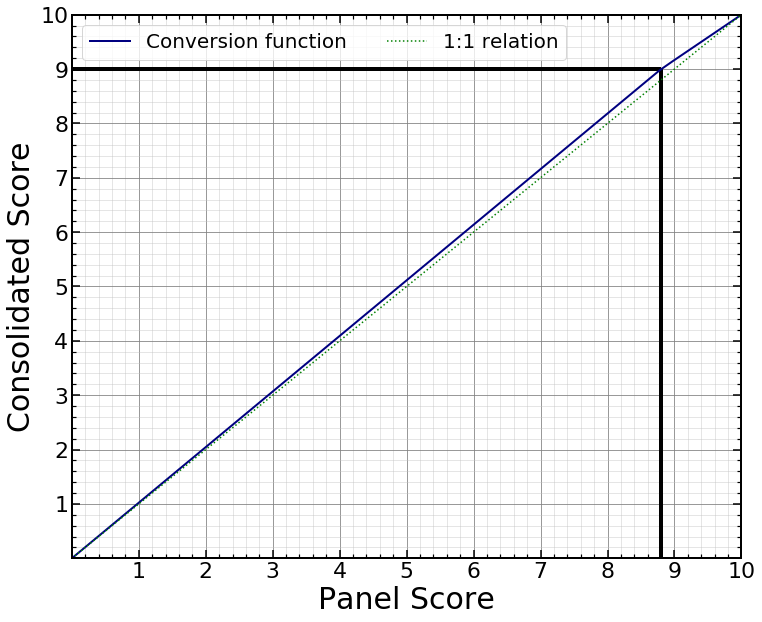

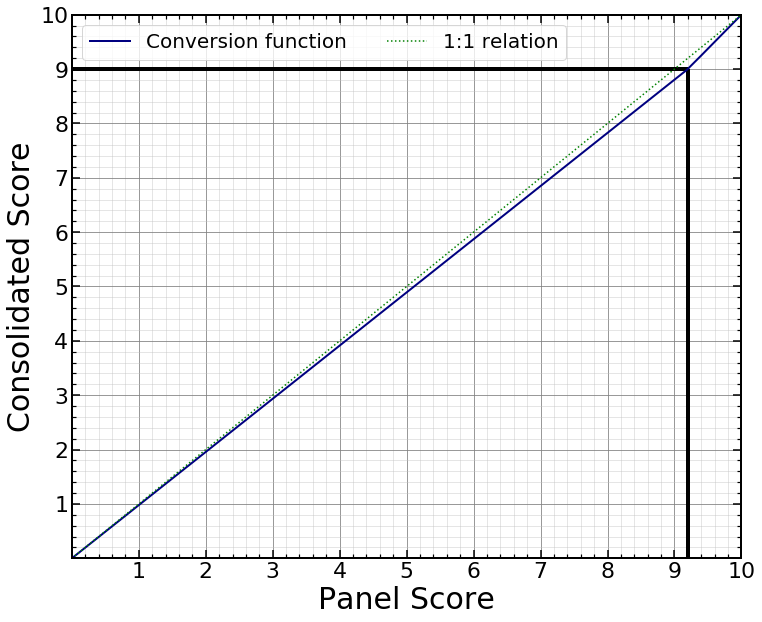

In [87]:
def conversion(x,t_i,t_glob=9):
    m1 = t_glob/t_i
    m2 = (10-t_glob)/(10-t_i)
    b2 = t_glob - m2*t_i
    
    if x <= t_i and x>0:
        return m1 * x
    elif x>t_i and x<=10:
        return m2*x+b2
    else:
        raise ValueError("Invalid score.")
    
def f(t_i,t_glob=9):
    m1 = t_glob/t_i
    m2 = (10-t_glob)/(10-t_i)
    b2 = t_glob - m2*t_i
    
    fig,ax = mpl.subplots(figsize=(12,10))
    
    xx = np.linspace(0,10)
    yy = np.zeros_like(xx)
    
    yy[xx<=t_i] = m1*xx[xx<=t_i]
    yy[xx>t_i] = m2*xx[xx>t_i] + b2
    ax.plot(xx,yy,color="Navy",linewidth=2,label="Conversion function")
    
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.plot([0,10],[0,10],":",color="green",label="1:1 relation")
    ax.vlines(t_i,0,t_glob,lw=4)
    ax.hlines(t_glob,0,t_i,lw=4)
    
    ax.set_xticks(np.arange(1,11,1))
    ax.set_yticks(np.arange(1,11,1))
    ax.grid(True,which="major",color="gray")
    ax.grid(True,which="minor",color="silver",alpha=0.5)
    ax.set_ylabel("Consolidated Score")
    ax.set_xlabel("Panel Score")
    ax.legend(frameon=True, ncol=2)
    return fig 

f1 = f(8.8,9.0)
f2 = f(9.2,9.0)

In [81]:
## Example
## conversion(score, score last )

conversion(8.6,9.2,9)


8.413043478260871